In [ ]:
from multiprocessing import Pool
import time
import os

def my_func(work):
    print("일(={0})에 Process ID = {1}".format(work, os.getpid()))
    time.sleep(1)
    return work

if __name__ == "__main__":
    #프로세스 갯수 3 -> 결과에서 ProcessID가 3종류이다
    p = Pool(3)

    #작업 이전의 시간을 기록
    startTime = int(time.time())

    #처리해야 하는 일의 갯수를 range함수로 나타내준다.
    print(p.map(my_func, range(0, 30)))

    #작업 이후의 시간을 기록
    endTime = int(time.time())

    #경과 시간을 출력
    print("작업 시간 = 약 {0}s", (endTime-startTime))


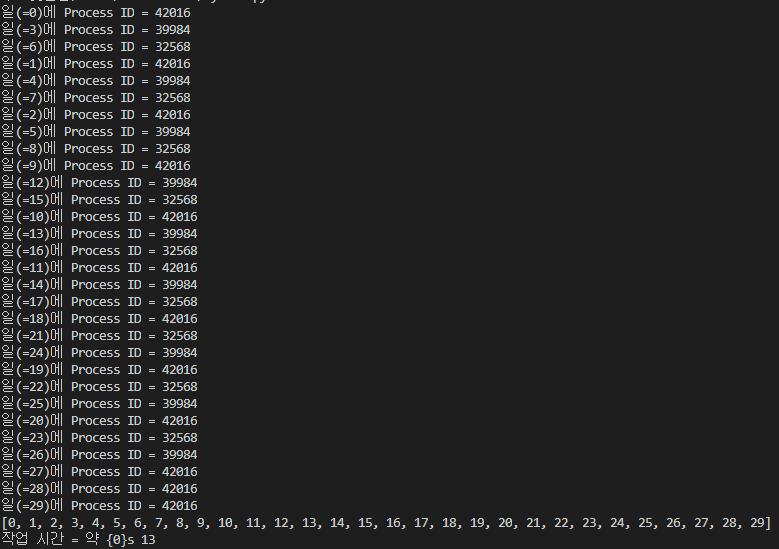

In [ ]:
import os
import time
from multiprocessing import Process

def seconds_timer(end_time):
    #시작 시각 저장
    start_time = time.time()
    while True:
        time.sleep(0.001)
        #경과 시간이 end_time 초과일 경우 종료
        if time.time() - start_time > end_time:
            break
    
    proc = os.getpid()
    print("{0} seconds have elapsed by process id : {1}".format(end_time, proc))

if __name__ == "__main__":
    #각 프로세서의 end_time
    end_time_list = [5, 5, 5]
    procs = []

    startTime = int(time.time())

    #이 코드에서는 총 세개의 프로세서가 생성되고 실행됨
    for end_time in end_time_list:
        #프로세스 객체로 만들어줌
        proc = Process(target=seconds_timer, args=(end_time,))
        procs.append(proc)

        #프로세서 실행
        proc.start()
    
    #세 개의 프로세스가 비동기로 실행되기 때문에 끝나지 않도록
    #join을 사용해준다
    for proc in procs:
        proc.join()

    #끝나는 시각 저장
    endTime = int(time.time())
    print("작업 시간 = 약 {0}s".format(endTime-startTime))


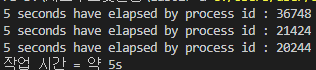

In [ ]:
from multiprocessing import Process, Queue
import random

def data_creator(max_data_number, q):
    print("creating data!")
    for _ in range(max_data_number):
        #랜덤으로 만들어진 수를 queue에 삽입
        data = random.random()
        q.put(data)
    
    #마지막에 None 삽입
    q.put(None)

def data_consumer(q):
    while True:
        #q안에 있는 데이터를 받아내기
        data = q.get()

        #데이터가 None이면 종료
        if data is None:
            break
        print("consumed data is {}".format(data))


if __name__ == "__main__":
    #한쪽에서 데이터를 집어넣고 반대편에서 데이터를 꺼내서 쓰는 자료구조
    q = Queue()

    max_data_number = 10
    
    #프로세서 생성과 실행
    process_creator = Process(target=data_creator, args=(max_data_number, q))
    process_consumer = Process(target=data_consumer, args=(q,))
    process_creator.start()
    process_consumer.start()

    q.close()
    #멀티 프로세서에서 Queue가 쓰레드를 사용하기 때문에 join_thread() 사용
    q.join_thread()

    #프로세스들이 죽기 전에 main이 끝나면 안됨
    #join을 써줘서 유지해준다
    process_creator.join()
    process_consumer.join()

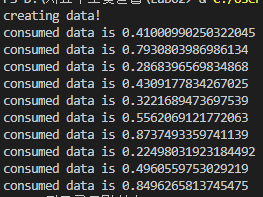